# Introduction to Probability Theory

GNOME bootmap
August 17, 2016

### Overview

 * Definition of probability: discrete
   * Normalization rules
   * Joint probability distribution
 * Definition of probability: continuous
   * Moments
   * Cumulative distribution function

In [30]:
# Preliminaries
import numpy
import scipy.special
import scipy.stats
import pandas
import seaborn
import matplotlib
from matplotlib import pyplot
%matplotlib inline

## Probability

Simple definition: chance (percent) of an outcome defined over a set of *possible* outcomes. Said differently, over an 'ensemble' of identical experiments with the given outcomes, an event will occur with a frequency proportional to its probability.

### Example

__What is the probability of a coin landing on heads?__

Possible outcomes: Heads, Tails, on the side

In order to assign probabilities, we use intuition. The two sides of a coin are equal surface and if we treat the coin as two dimensional, then on the side is *not* possible. Proceed under this assumption. Since the sides are equal surface, we assign each equal probability.

>First Rule of Probability Theory
>
>Distributions over a defined set of outcomes must be properly normalized. The sum of the probability of all the enumerated outcomes must be unity.

This means that, for a given test, only *one* outcome can happen. There are two possible outcomes and each has equal chance of occuring, so for a fair coin with no "side", each has 50% chance of occuring. If we define $p_H$ as the probability of heads and $p_T$ as the probability of tails, then there are no other outcomes to consider and we establish that $p_H = p_T = 0.5$.

In [31]:
p_H = p_T = 0.5

*Is this properly normalized?*

The First Rule establishes that an outcome must occur, so by summing over the probabilities, we must get exactly one. If not, then we have an outcome(s) we have not accounted for. We can state this in mathematical terms:

$$
\sum_i p(x_i) \equiv 1
$$

Where $x_i$ is the outcome labeled with index $i$. In our case we, explicitly, have:

$$
\sum_i p(x_i) = p_H + p_T
$$

In [32]:
print p_H + p_T

1.0


So, our question is trivially answered. The probability of heads is the same as tails, and there is only two outcomes, so the probability is $1/2$.

__What is the probabiliy of three heads in a row?__

We will assume from here on out that the coin is "fair", i.e. follows the probabilities established above. We are asking the question: "If I perform multiple experiments, what is the probability of obtaining a certain outcome from each?" We define the probability of this as $p(x_1, x_2, x_3)$ --- this is called the _joint_ probability. It can be read as "the joint probability of $x_1$ _and_ $x_2$ _and_ $x_3$ where *and* is read as the logical (exclusive) union operator.

In general, this can be a tricky question to answer, especially if the outcome of one experiment *depends* on the previous ones. However, in our case, we are flipping a fair coin three times and each outcome is independent. We need a rule to handle this case.

>Second Rule of Probability
>
>If all experimental trials in a joint probability are independent, then the joint probability is the product of the individual experiment probabilities

$$
p(\bigcap_i x_i) = \prod_i p(x_i)
$$

The $\bigcap$ symbol stands for "intersection" and implies the _and_ functionality above, extended to arbitrarily many experimental trials. Specializing to the question at hand:

$$
p(x_1, x_2, x_3) = p(x_1)p(x_2)p(x_3)
$$

Even more specifically, $p(H) \equiv p_H$. So...

<details> 
  <summary>Click to view answer</summary>
  $p(H, H, H) = p_H^3$ = 1/8
</details>

In [33]:
p_H**3

0.125

*Is this properly normalized?*

Actually, yes, because, we've set up a *new* experiment in our hypothesis, but the probabilities are individually properly normalized so this one *must* be. Let's verify.

We want the probability of the _union_ of events. If I flip the coin three times, then the number of possible distinct outcomes is:

<pre>
H H H
H H T
H T T 
H T H
T H H
T T H
T H T
T T T
</pre>

...8. So the probability of H, H, H is $1/8$.

Let's ask a slightly different question.

<details> 
  <summary>What is the probability of getting the *same* flip outcome three times in a row? E.g. what is the probability of H, H, H _or_ T, T, T?</summary>

$$
p(H, H, H) = p_H^3 = 1/8 \\
p(T, T, T) = p_H^3 = 1/8
$$

In the _or_ case, the probabilites are not exclusive, so they *add*.

$$
p(H, H, H \cup T, T, T) = 1/4
$$
</details>

In the above answer $\cup$ is read as _or_.

### Exercise

I've created a coin which isn't fair. It has a probability of landing on heads 60% of the time. The coin will otherwise fall on tails --- there are no other outcomes. __What is the probability of obtaining the sequence H, T, T?__

**Answer**

We first need to know what all the probabilities are. We know $p_H = 0.6$, and the only other outcome is $p_T$. Since we know the entire set of probabilities must sum to one, we have $p_H + p_T \equiv 1$ and so $p_T = 1 - p_H$ = 0.4$. Armed with this information, the code is as follows

```python
p_H = 0.6
p_T = 1 - p_H

p_H * p_T * p_T
```

The same table from above can be used to enumerate the possible outcomes, but they aren't all equally likely now. Combinations with H will appear more frequently because of the unfairness of the coin.

### Exercise

___What is the probability I get one or less H in a sequence of three unfair flips?___

**Answer**

We first need to know the number of combinations which has one or less H. We can read this off from the table above --- there are four: TTT (no heads) TTH, THT, HTT (permutations of one heads). But again, they are not equally likely, so we need the probabilities of these outcomes.

$$
p(TTT) = 0.4^3 \\
p(TTH) = p(THT) = p(HTT) = 0.4^2 \times 0.6 \\
$$

So the answer is

```python
p_T^3 + 3 * p_H * p_T^2
```

In probability theory, trials like this have a specific name. They are called [a Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial). The outcome of a sequence of Bernoulli trials is described by the [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):

$$
{n \choose k} p^k(1-p)^{n-k}
$$

This just codifies and extends our intuition from above. ${n \choose k}$, read "n choose k" is the binomial coefficient, $p$ is the probability of one outcome and $1-p$, by definition is the other. $n$ is the number of trials and $k$ is the number of times that $p$ occurs.

**What is the probability that, with the unfair coin from above, we obtain 50 heads and 50 tails?**

In [34]:
p_H = 0.6
n = 100
k = 50

print "Unfair coin:"
print scipy.special.binom(n, k) * p_H**k * (1 - p_H)**(n-k)

# Compare with a fair coin

print "Fair coin:"
p_H = 0.5
print scipy.special.binom(n, k) * p_H**k * (1 - p_H)**(n-k)

Unfair coin:
0.0103375112538
Fair coin:
0.0795892373872


## Discrete vs Continuous

The binomial distribution is an example of a _discrete_ probability distribution. The outcomes can be enumerated (they are [countable](https://en.wikipedia.org/wiki/Countable_set) and possibly finite (e.g. they are indexable). There are other discrete distribtions:

  * Poisson: https://en.wikipedia.org/wiki/Poisson_distribution
  * Negative binomial: https://en.wikipedia.org/wiki/Negative_binomial_distribution
  * Geometric: https://en.wikipedia.org/wiki/Geometric_distribution

In general, most are generalizations of Bernoulli trials under a given circumstance (the Poisson distribution being an exception).

Continuous distirbutions have an "uncountable" set of outcomes, and as such are not representable by discrete proabilities. Their probabilities are described instead by functions, and instead of speaking of probability (sometimes called probability mass) we speak of *proability density*. The probability density is almost always accompanined by a measure (in most cases the typical Riemann integration measure $dx$).

$$
p \in x, x + dx \equiv p(x)dx
$$

This extends the notion of the union above to probability density. In the continuous case, $p(x)$ is the __probability density__. It is the probability density *at* $x$, _not_ the probability of $x$. The probability of an outcome, now the continuous variable $x$ within the interval $(x, x+dx)$ is the integral of the density in the interval. It should be noted that there is no sense of the question, "What is the probability of obtaining *exactly* $x$". It is zero.

### Uniform Distribution

The (arguably) simplest continuous distribution is the uniform distribution. It assigns equal density to all members of the interval. In the interval $(a, b)$, that looks like the following:

$$
U(a, b) \propto \frac{1}{b-a}
$$

You can see it has no dependence on $x$. Normalization is easy to check:

$$
\int_a^b \frac{1}{b-a} dx = \left. \frac{x}{b-a}\right|_a^b = \frac{b}{b-a} - \frac{a}{b-a} = 1
$$

Let's plot.

(0, 2)

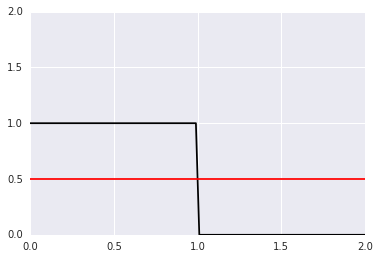

In [62]:
x = numpy.linspace(0, 2, 100)

# Notice that the probability density is zero outside the limits
dist = scipy.stats.uniform(0, 1)
pyplot.plot(x, dist.pdf(x), 'k-')

# Notice that the normalization changes when the bounds change
dist = scipy.stats.uniform(0, 2)
pyplot.plot(x, dist.pdf(x), 'r-')
pyplot.xlim(0, 2)
pyplot.ylim(0, 2)

### Measuring the Distribution

Oftentimes, we will not necessarily have an analytic way of describing the distribution --- a wide class of problems in statistics boils down to categorizing or describing a distribution from a set of data. Oftentimes we have a sample of the distribution, and must make inference with that data.

Let's take a look at what we can do with samples. First we need to generate some. We'll generate 10000 samples from the distribution above confined again to $(0, 1)$.

In [63]:
dist = scipy.stats.uniform(0, 1)
n_samp = 10000
samples = dist.rvs(n_samp)

So, how can we approximate the function based on its samples? The key is to recall that $p(x)$ is a *density*. So, one way is to approximate the density using the samples. If we "bin" up the samples, by measuring the number in a given subinterval, the density is the approximation:

$$
p(x) \sim \sum_i \frac{I(x_i)}{\delta x}
$$

Where the $I$ is the indicator function, 1 if the sample lies in the subinterval, 0 if not. Plotting bars over the subintervals with heights corresponding to the count derived from the indicator function forms the basis of the histogram. It is interpreted as the frequency of values from the subinterval per subinterval.

In [64]:
freq, bin_edge = numpy.histogram(samples, bins=100)

Plotting this with bars approximates the density as constant over the subinterval with the relative value of the frequency.

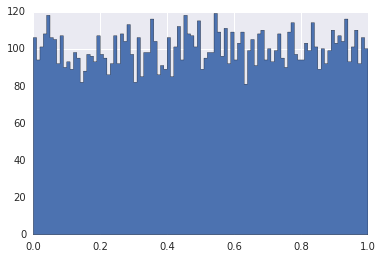

In [65]:
pyplot.hist(samples, bins=100, histtype='stepfilled');

You can ask it to normalize the histogram so that it is a true probability density. We'll overplot the true density on top for comparison.

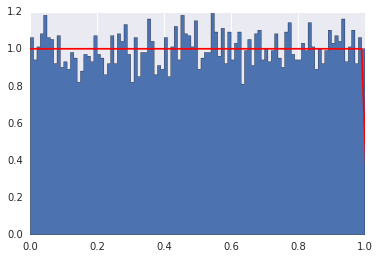

In [67]:
pyplot.hist(samples, bins=100, normed=True, histtype='stepfilled')
pyplot.xlim(0, 1)
pyplot.plot(x, dist.pdf(x), 'r-');

Not bad. The blue histogram will converge to the distribution line as the number of samples increases. An infinite number of samples would be required to smooth out *all* the fluctuations, but as mentioned the histogram is an approximation. One can also affect the approximation by changing $\delta x$, the bin width, and fewer bins means more fidelity (more samples per bin), but less resolution.

We can display this effect by binning fewer and fewer samples.

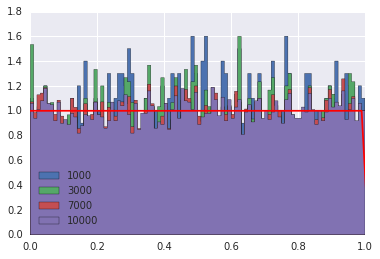

In [70]:
pyplot.hist(samples[:1000], bins=100, normed=True, histtype='stepfilled', label="1000")
pyplot.hist(samples[:3000], bins=100, normed=True, histtype='stepfilled', label="3000")
pyplot.hist(samples[:7000], bins=100, normed=True, histtype='stepfilled', label="7000")
pyplot.hist(samples, bins=100, normed=True, histtype='stepfilled', label="10000")
pyplot.plot(x, dist.pdf(x), 'r-');
pyplot.xlim(0, 1)
pyplot.legend(loc="lower left");

## The Gaussian Distribution and Moments

We now turn our attention to the [Normal/Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution). It is completely described by two values: its mean (typically $\mu$, describing its *location*) and variance (typically $\sigma^2$, describing its *width*):

$$
N(\mu, \sigma) \equiv \frac{1}{\sqrt{2\sigma^2}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)
$$

We'll do our sampling and compare to the known analytical result. One issue here is that the Gaussian distribution is over the infinite interval --- we can't plot that. So, we'll do it over several "widths" of the distribution. At some point the deviations from zero are not noticeable.

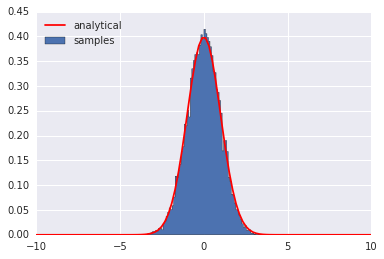

In [74]:
mu, sigma = 0., 1.
dist = scipy.stats.norm(mu, sigma)
n_samp = 10000
samples = dist.rvs(n_samp)

x = numpy.linspace(-10*sigma, 10*sigma, 100)

pyplot.hist(samples, bins=100, normed=True, histtype='stepfilled', label="samples")
pyplot.plot(x, dist.pdf(x), 'r-', label="analytical")
pyplot.legend(loc="upper left");

The _expectation value_ of a distribution with respect to a function is defined as follows:

$$
E[f(x)] = \int f(x) p(x) dx
$$

_Moments_ of a distribution are defined as $f(x) = x^n$ with $n$ being an integer power. For $n=0$, the zeroth moment is one (for a properly normalized distribution). The first moment, __the mean__, is $E[x]$. Some math will show that $E[x]$ for the normal distribution is $\mu$. The second moment $E[x^2]$ is the variance $\sigma^2$.

We can compute these numerically as well. When computed from samples, they are the "sample mean" and the "sample variance" since they only converge to the true moments in the limit of infinite samples. This is one way of characterizing a distribution from its samples.

In [76]:
print "Mean: %f" % numpy.mean(samples)
print "Variance: %f" % numpy.std(samples)**2

Mean: -0.004345
Variance: 0.968698


## Cumulative Distribution Function

Another important feature of probability densities is the cumulative distribution function (CDF), which is formed from integrating the PDF.

$$
P(x_0) = \int_{-\infty}^{x_0} p(x) dx
$$

The left and right integrals are similarly defined and only the same if the PDF is symmetric. $P(-\infty) \equiv 0$ and $P(\infty) \equiv 1$ always. The CDF of the uniform distribution is straightforward:

$$
\int_{-\infty}^{x_0} \frac{1}{b-a} dx \rightarrow \int_a^{x_0} \frac{1}{b-a} dx = \frac{x_0-a}{b-a}
$$

Note that the integral is only non-zero within $(a,b)$, so $a < x_0 \leq b$, or by definition, $P(x_0 > b) = 1$.

For the Gaussian, the CDF is a bit harder. The answer is not an analytic function, but it often appears. It is often called the "error function" or `erf`. With generalized parameters $\mu$ and $\sigma$, it can be expressed as follows:

$$
P\left(\frac{x-\mu}{\sigma}\right) = \frac{1}{2}\left(1 + \textrm{erf}{\frac{x}{\sqrt{2}}}\right)
$$

We plot it below. The CDF can also be approximated from a set of samples by *ordering* the samples, and at each sample point, plotting $n/N$ where $n$ is the index of the sample in the order and $N$ is the total number of samples. Again, as $N\rightarrow\infty$ this approximation (sometimes called the empirical CDF or ECDF) converges to the CDF.

(-4.0, 4.0)

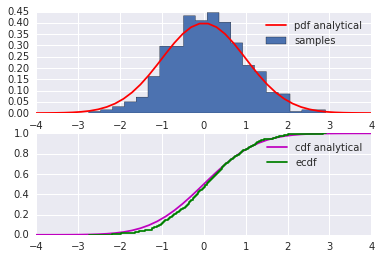

In [88]:
n_samp = 500
samples = dist.rvs(n_samp)

# Plot PDF
pyplot.subplot(2, 1, 1)
pyplot.plot(x, dist.pdf(x), 'r-', label="pdf analytical")
pyplot.hist(samples, bins=20, normed=True, histtype='stepfilled', label="samples")
pyplot.legend()

# Sort the samples and set up the y axis
srt = numpy.argsort(samples)
yaxis = numpy.linspace(0, n_samp, n_samp)/float(n_samp)
pyplot.xlim(-4*sigma, 4*sigma)

# Plot CDF
pyplot.subplot(2, 1, 2)
pyplot.plot(x, dist.cdf(x), 'm-', label="cdf analytical")
pyplot.step(samples[srt], yaxis, color='g', label="ecdf")
pyplot.legend()
pyplot.xlim(-4*sigma, 4*sigma)

### Exercise

Plot PDF and CDF, sample, and find the mean and variance for another continuous distirbution. Here's a listing of a few --- note that a few might require one less or one more parameter:

 * `scipy.stats.beta`
 * `scipy.stats.gamma`
 * `scipy.stats.expon`
 * `scipy.stats.lognorm`
 * `scipy.stats.chi2` (this one has only one parameter --- the number of degrees of freedom)
 * `scipy.stats.maxwell`

Try adjusting the number of samples up and down and watch the approximation fidelity.